In [28]:
import os
import requests
from dotenv import load_dotenv
import pandas as pd

# Load environment variables from .env file
load_dotenv()

SUPABASE_KEY = os.getenv("SUPABASE_KEY")

url = f"https://iukxcgvmzjfelwfrpkyi.supabase.co/rest/v1/analytics?apikey={SUPABASE_KEY}&select=*"
headers = {
    "apikey": SUPABASE_KEY,
    "Authorization": f"Bearer {SUPABASE_KEY}",
}

response = requests.get(url, headers=headers)


# Create a dataframe from the JSON response payload
data = response.json()


In [36]:
df = pd.DataFrame(data)
print(len(df))
blacklisted_user_ids = ["390c0190-33a3-4029-ae09-687bff0b77d6"]
should_delete = df[df["type"] == "delete-data"]
blacklisted_user_ids.extend(should_delete["user_id"].tolist())

# Filter out rows where user_id is in the blacklisted_user_ids array
df = df[~df["user_id"].isin(blacklisted_user_ids)]

def hasStrategy(id):
    if len(id) < 8:
        return False
    
    digit = id[7]
    if digit in [0, 2, 4, 6, 8, 'a', 'c', 'e']:
        return True
    return False


def get_top_domain(domain: str) -> str:
    if domain.startswith("www") or domain.startswith("ww2"):
        domain = domain[4:]
    
    d = domain.split("/")[0]

    return ".".join(d.split(".")[-3:]) if ".co.uk" in d else ".".join(d.split(".")[-2:])

# Add column that says if the user has a strategy or not
df["has_strategy"] = df["user_id"].apply(hasStrategy).apply(lambda x: "Yes" if x else "No")
df["domain"] = df["url"].apply(lambda x: get_top_domain(x) if x != None else None)
# Define an empty array for blacklisted user ids


df.head()


2682


,id,type,url,payload,user_id,session_id,received_at,created_at,has_strategy,domain
0,16926,time-spent,www.amazon.com/Amazon-Brand-Decorative-Decorat...,"{""duration"":738}",98ec858e-c25a-4c2a-a588-cfe9cf8a1fb9,b1d23a46-7793-48b7-bfef-02d2bf61309c,2025-03-14T00:03:23.770546+00:00,2025-03-14T00:03:18.47+00:00,Yes,amazon.com
1,16927,time-spent,www.amazon.com/Amazon-Brand-Decorative-Decorat...,"{""duration"":4447}",98ec858e-c25a-4c2a-a588-cfe9cf8a1fb9,b1d23a46-7793-48b7-bfef-02d2bf61309c,2025-03-14T00:03:27.312308+00:00,2025-03-14T00:03:22.917+00:00,Yes,amazon.com
2,16928,uninstall,www.lessextension.com/goodbye,None,98ec858e-c25a-4c2a-a588-cfe9cf8a1fb9,none,2025-03-14T00:03:34.022325+00:00,2025-03-14T00:03:29.737+00:00,Yes,lessextension.com
10,16944,on-onboarding,www.lessextension.com/onboarding,None,none,none,2025-03-14T16:00:23.615042+00:00,2025-03-14T16:00:22.709+00:00,No,lessextension.com
11,16945,on-onboarding,www.lessextension.com/onboarding,None,none,none,2025-03-14T17:55:19.528221+00:00,2025-03-14T17:55:19.168+00:00,No,lessextension.com


In [43]:
df["domain"].value_counts()

KeyError: 'domain'

In [44]:
# Create a new data frame, where it only includes a single sample of each type of event. The event is the "type" column.
df_unique = df.drop_duplicates(subset=["type"])
df_unique


,id,type,url,payload,user_id,session_id,received_at
created_at,,,,,,,
2025-03-14 00:03:23.770546+00:00,16926,time-spent,www.amazon.com/Amazon-Brand-Decorative-Decorat...,"{""duration"":738}",98ec858e-c25a-4c2a-a588-cfe9cf8a1fb9,b1d23a46-7793-48b7-bfef-02d2bf61309c,2025-03-14T00:03:23.770546+00:00
2025-03-14 00:03:34.022325+00:00,16928,uninstall,www.lessextension.com/goodbye,None,98ec858e-c25a-4c2a-a588-cfe9cf8a1fb9,none,2025-03-14T00:03:34.022325+00:00
2025-03-14 12:58:21.178126+00:00,16937,page-view,www.amazon.de/,None,390c0190-33a3-4029-ae09-687bff0b77d6,7a17b203-599b-46f9-8191-24ef62a74fbe,2025-03-14T12:58:21.178126+00:00
2025-03-14 16:00:23.615042+00:00,16944,on-onboarding,www.lessextension.com/onboarding,None,none,none,2025-03-14T16:00:23.615042+00:00
2025-03-15 11:49:42.544898+00:00,16955,active,kcgblchgejkpnemehaojecgbamdiacml/popup.html,true,4dd84d7b-578b-4c4a-9ddd-b99c02515df7,54cffff4-f3e4-45f6-945d-0dccff44a05a,2025-03-15T11:49:42.544898+00:00
2025-03-15 11:50:12.717857+00:00,16967,add-to-cart,www.zalando.dk/pier-one-fleecetroejer-pine-gro...,None,4dd84d7b-578b-4c4a-9ddd-b99c02515df7,54cffff4-f3e4-45f6-945d-0dccff44a05a,2025-03-15T11:50:12.717857+00:00
2025-03-17 13:20:50.209908+00:00,17191,from-directs,www.lessextension.com/,"""anticonsumption""",less-website,none,2025-03-17T13:20:50.209908+00:00
2025-03-17 13:41:45.949022+00:00,17194,from-directs-cta,www.lessextension.com/,"""chrome_extension""",less-website,none,2025-03-17T13:41:45.949022+00:00
2025-03-15 11:50:32.309562+00:00,16979,cancel,www.zalando.dk/checkout/confirm,None,4dd84d7b-578b-4c4a-9ddd-b99c02515df7,54cffff4-f3e4-45f6-945d-0dccff44a05a,2025-03-15T11:50:32.309562+00:00


In [49]:
# count different types of events
event_counts = df["type"].value_counts()
print(event_counts)

type
time-spent                            1822
from-directs                           309
page-view                              257
on-onboarding                          124
from-directs-cta                        48
open-popup                              41
active                                  15
uninstall                               13
welcome-modal-seen                      13
add-to-cart                             11
enforce_wait_modal_shown                 8
place-order                              6
enforce_wait_canceled                    5
open-options                             3
enforce_wait_info_expanded               3
enforce_wait_permit_valid_on_click       2
cancel                                   1
delete-data                              1
Name: count, dtype: int64


In [53]:
import re

# Count unique user IDs
# Define a regex pattern for UUIDv4
uuidv4_pattern = re.compile(r'^[a-f0-9]{8}-[a-f0-9]{4}-4[a-f0-9]{3}-[89ab][a-f0-9]{3}-[a-f0-9]{12}$', re.IGNORECASE)

# Filter user_id's that match the UUIDv4 pattern
uuidv4 = df[df["user_id"].apply(lambda x: bool(uuidv4_pattern.match(x)))]
unique_users = uuidv4["user_id"].nunique()

uninstalled = df[df["type"] == "uninstall"]
unique_uninstalled = uninstalled["user_id"].nunique()
unique_installed = unique_users - unique_uninstalled

# look at the last active event for each unique user. If the last event has a payload of "false", this means they've deactivated it.
# I'd like to know how many of the current installed users have deactivated the extension.
last_active = df[df["type"] == "active"]
last_active = last_active.drop_duplicates(subset=["user_id"], keep="last")
last_active = last_active[last_active["payload"] == "false"]
unique_deactivated = last_active["user_id"].nunique()
totally_active = unique_installed - unique_deactivated
on_onboarding = df[(df["type"] == "on-onboarding") & (df["payload"].apply(lambda x: x != '""'))]

print("Installations:", len(on_onboarding), "\nUser activity seen from", unique_users, "\nuninstalled:", unique_uninstalled, "\ndeactivated:", unique_deactivated, "\nTotal registered active users:", totally_active)

Installations: 51 
User activity seen from 34 
uninstalled: 13 
deactivated: 4 
Total registered active users: 17


<Axes: >

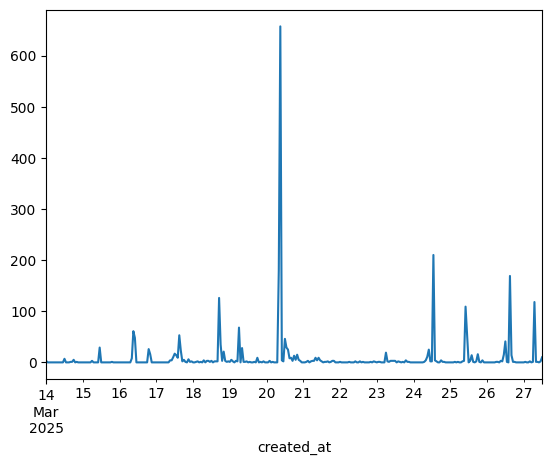

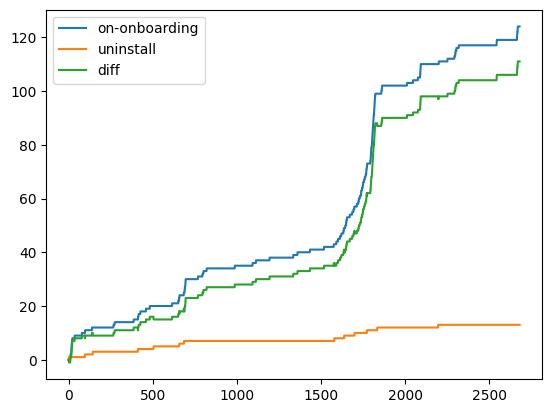

In [54]:
# Create a graph over time of the number of events
df["created_at"] = pd.to_datetime(df["received_at"], utc=True)
df.set_index("created_at", inplace=True)
df["count"] = 1
df["count"].resample("H").sum().plot()

df = pd.DataFrame(data)

# I want a graph that helps me understand how many onboarding events are happening, and how many uninstall. So perhaps a accumulative graph that shows how many users are onboarded and how many are uninstalled.
df["created_at"] = pd.to_datetime(df["received_at"], utc=True)
df["on-onboarding"] = df["type"] == "on-onboarding"
df["uninstall"] = df["type"] == "uninstall"
df["on-onboarding"] = df["on-onboarding"].astype(int)
df["uninstall"] = df["uninstall"].astype(int)
df["on-onboarding"] = df["on-onboarding"].cumsum()
df["uninstall"] = df["uninstall"].cumsum()
df["diff"] = df["on-onboarding"] - df["uninstall"]
df[["on-onboarding", "uninstall", "diff"]].plot()

In [55]:
df = pd.DataFrame(data)

# Count unique user ids
unique_user_ids = df["user_id"].nunique()
print("Unique user ids:", unique_user_ids)

# Display unique user ids over time
df["created_at"] = pd.to_datetime(df["received_at"], utc=True)
df.set_index("created_at", inplace=True)
df["unique_users"] = df["user_id"].expanding().apply(lambda x: len(pd.unique(x)), raw=False)
df["unique_users"].plot(title="Accumulated Unique User IDs Over Time")

Unique user ids: 36


DataError: No numeric types to aggregate